In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57eafbd27f05ffd5b803eef5f278b318


In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | weiser
Processing Record 2 of Set 1 | samarkand
Processing Record 3 of Set 1 | panhala
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | guararapes
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | gainesville
Processing Record 8 of Set 1 | buraydah
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | tangshan
Processing Record 12 of Set 1 | lazaro cardenas
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | hualmay
Processing Record 16 of Set 1 | rocha
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | novyy urengoy
Processing Record 21 of Set 1 | egvekinot
Processing Record 22 of Set 1 | butaritari
Processing Record 23 

Processing Record 39 of Set 4 | ginda
Processing Record 40 of Set 4 | atambua
Processing Record 41 of Set 4 | agadez
Processing Record 42 of Set 4 | tura
Processing Record 43 of Set 4 | touros
Processing Record 44 of Set 4 | yerbogachen
Processing Record 45 of Set 4 | nouadhibou
Processing Record 46 of Set 4 | grand gaube
Processing Record 47 of Set 4 | salalah
Processing Record 48 of Set 4 | maputo
Processing Record 49 of Set 4 | esperance
Processing Record 50 of Set 4 | cayenne
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | tamiahua
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 5 | labutta
City not found. Skipping...
Processing Record 5 of Set 5 | pathein
Processing Record 6 of Set 5 | policoro
Processing Record 7 of Set 5 | xam nua
Processing Record 8 of Set 5 | corbu
Processing Record 9 of Set 5 | matipo
Processing Record 10 of Set 5 | evensk
Processing Record 11 of Set 5 | pochutla
Processing Record 12

Processing Record 24 of Set 8 | kibala
Processing Record 25 of Set 8 | nikel
Processing Record 26 of Set 8 | keti bandar
Processing Record 27 of Set 8 | belaya gora
Processing Record 28 of Set 8 | port blair
Processing Record 29 of Set 8 | doume
Processing Record 30 of Set 8 | hunza
City not found. Skipping...
Processing Record 31 of Set 8 | padang
Processing Record 32 of Set 8 | taltal
Processing Record 33 of Set 8 | maceio
Processing Record 34 of Set 8 | aklavik
Processing Record 35 of Set 8 | balkanabat
Processing Record 36 of Set 8 | nicoya
Processing Record 37 of Set 8 | birao
Processing Record 38 of Set 8 | nome
Processing Record 39 of Set 8 | ruginoasa
Processing Record 40 of Set 8 | mali
Processing Record 41 of Set 8 | vila velha
Processing Record 42 of Set 8 | pudozh
Processing Record 43 of Set 8 | riyadh
Processing Record 44 of Set 8 | la palma
Processing Record 45 of Set 8 | sault sainte marie
Processing Record 46 of Set 8 | si bun ruang
Processing Record 47 of Set 8 | faya


Processing Record 14 of Set 12 | morant bay
Processing Record 15 of Set 12 | new richmond
Processing Record 16 of Set 12 | qurayyat
Processing Record 17 of Set 12 | mnogovershinnyy
Processing Record 18 of Set 12 | callaway
Processing Record 19 of Set 12 | taoudenni
Processing Record 20 of Set 12 | honningsvag
Processing Record 21 of Set 12 | la ronge
Processing Record 22 of Set 12 | tecoanapa
Processing Record 23 of Set 12 | ende
Processing Record 24 of Set 12 | pacific grove
Processing Record 25 of Set 12 | guerrero
Processing Record 26 of Set 12 | chapais
Processing Record 27 of Set 12 | whyalla
Processing Record 28 of Set 12 | waingapu
Processing Record 29 of Set 12 | seoul
Processing Record 30 of Set 12 | kargasok
Processing Record 31 of Set 12 | ust-koksa
Processing Record 32 of Set 12 | amderma
City not found. Skipping...
Processing Record 33 of Set 12 | gulbene
Processing Record 34 of Set 12 | pueblo nuevo solistahuacan
Processing Record 35 of Set 12 | boma
Processing Record 36 

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Weiser,44.2510,-116.9693,58.03,54,74,12.97,US,2021-05-22 23:16:33
1,Samarkand,39.6542,66.9597,65.62,45,66,4.61,UZ,2021-05-22 23:16:33
2,Panhala,16.8167,74.1167,70.16,91,6,4.76,IN,2021-05-22 23:16:34
3,Rikitea,-23.1203,-134.9692,76.50,67,3,12.77,PF,2021-05-22 23:16:34
4,Guararapes,-21.2608,-50.6428,65.14,96,100,7.83,BR,2021-05-22 23:13:25
5,Saint-Philippe,-21.3585,55.7679,69.39,71,79,11.83,RE,2021-05-22 23:16:34
6,Gainesville,29.6516,-82.3248,82.60,46,1,11.50,US,2021-05-22 23:15:26
7,Buraydah,26.3260,43.9750,88.25,16,84,8.10,SA,2021-05-22 23:16:35
8,Busselton,-33.6500,115.3333,45.09,72,91,7.14,AU,2021-05-22 23:16:35
9,Atuona,-9.8000,-139.0333,80.22,68,35,15.12,PF,2021-05-22 23:16:35


In [17]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [18]:
city_data_df = city_data_df[new_column_order]

In [19]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Weiser,US,2021-05-22 23:16:33,44.2510,-116.9693,58.03,54,74,12.97
1,Samarkand,UZ,2021-05-22 23:16:33,39.6542,66.9597,65.62,45,66,4.61
2,Panhala,IN,2021-05-22 23:16:34,16.8167,74.1167,70.16,91,6,4.76
3,Rikitea,PF,2021-05-22 23:16:34,-23.1203,-134.9692,76.50,67,3,12.77
4,Guararapes,BR,2021-05-22 23:13:25,-21.2608,-50.6428,65.14,96,100,7.83
5,Saint-Philippe,RE,2021-05-22 23:16:34,-21.3585,55.7679,69.39,71,79,11.83
6,Gainesville,US,2021-05-22 23:15:26,29.6516,-82.3248,82.60,46,1,11.50
7,Buraydah,SA,2021-05-22 23:16:35,26.3260,43.9750,88.25,16,84,8.10
8,Busselton,AU,2021-05-22 23:16:35,-33.6500,115.3333,45.09,72,91,7.14
9,Atuona,PF,2021-05-22 23:16:35,-9.8000,-139.0333,80.22,68,35,15.12


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1621725519.5884757

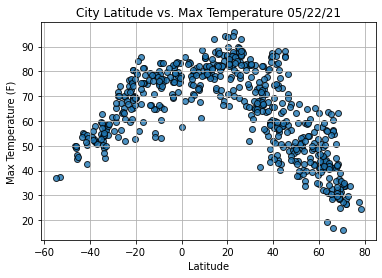

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

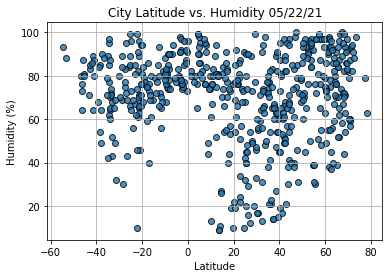

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

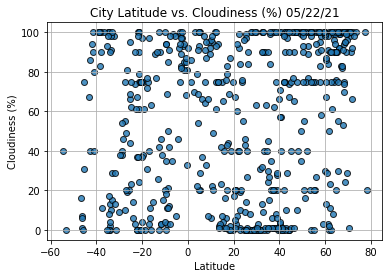

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

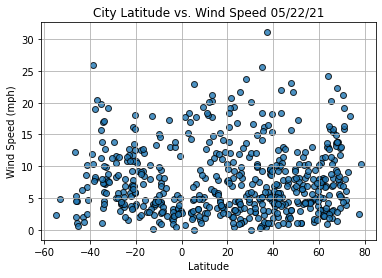

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Import linregress
    from scipy.stats import linregress

    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Weiser,US,2021-05-22 23:16:33,44.2510,-116.9693,58.03,54,74,12.97
1,Samarkand,UZ,2021-05-22 23:16:33,39.6542,66.9597,65.62,45,66,4.61
2,Panhala,IN,2021-05-22 23:16:34,16.8167,74.1167,70.16,91,6,4.76
6,Gainesville,US,2021-05-22 23:15:26,29.6516,-82.3248,82.60,46,1,11.50
7,Buraydah,SA,2021-05-22 23:16:35,26.3260,43.9750,88.25,16,84,8.10


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))